# Análisis de Ventas – Empresa de Telecomunicaciones
Proyecto de análisis de datos con Python para explorar ventas, márgenes y rentabilidad durante un mes, detectando patrones y oportunidades de mejora.

**Tecnologías:** Python, Pandas, Seaborn, Matplotlib
**Objetivo:** Identificar relaciones clave entre variables para apoyar la toma de decisiones.
**Autor:** Alexander Marín
**Fecha:** Agosto 2025

In [ ]:
# Importar librerias generales a utilizar
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar datos
df = pd.read_excel("/content/1. Base_proyecto.xlsx")
#df.drop(df.columns[0], axis=1, inplace = True)
print("Resumen inicial de los datos\n")
df.info()

Resumen inicial de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19552 non-null  int64  
 1   Dia           19552 non-null  int64  
 2   EquipoSim     19552 non-null  object 
 3   Tipo          19552 non-null  object 
 4   Subtipo       19552 non-null  object 
 5   Marca         19552 non-null  object 
 6   Gama          19552 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       19552 non-null  float64
 9   Costo         19552 non-null  float64
 10  Margen        0 non-null      float64
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    19552 non-null  object 
 13  CanalVenta    19551 non-null  object 
 14  CadenaDealer  16243 non-null  object 
 15  Departamento  19404 non-null  object 
 16  Canal         19552 non-null  object 
 17  SubCanal      19552 non-null  object 
 

In [ ]:
# Mostrar datos de tres variables problema inicio
print("Primeras filas de las variables Precio, Margen y Rentabilidad:\n")
display(df[['Precio', 'Margen', 'Rentabilidad']].head(10))

Primeras filas de las variables Precio, Margen y Rentabilidad:



,Precio,Margen,Rentabilidad
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [ ]:
# Mostrar datos de tres variables problema final
print("Primeras filas de las variables Precio, Margen y Rentabilidad:\n")
display(df[['Precio', 'Margen', 'Rentabilidad']].tail(10))

Primeras filas de las variables Precio, Margen y Rentabilidad:



,Precio,Margen,Rentabilidad
19542,NaN,NaN,NaN
19543,NaN,NaN,NaN
19544,NaN,NaN,NaN
19545,NaN,NaN,NaN
19546,NaN,NaN,NaN
19547,NaN,NaN,NaN
19548,NaN,NaN,NaN
19549,NaN,NaN,NaN
19550,NaN,NaN,NaN
19551,NaN,NaN,NaN


- Se encontraron datos nulos en algunas variables, pero puntulamente tres sin ningún dato (vacíos), por lo que se tratan primero estos

In [ ]:
# La variable Precio se elimina por estar vacía, pero Margen y Rentabilidad se calculan

print("Operaciones iniciales en las variables, como\n eliminación de 'Precio' y cálculo de 'Margen' y 'Rentabilidad'\n ")

df = df.drop('Precio', axis = 1)

df['Margen'] = (df['Ingreso'] - df['Costo']).round(2)

df['Rentabilidad'] = ((df['Margen'] / df['Costo']) * 100).round(2)

#df = df.dropna()

print("\n Resumen de los datos previo tratamiento de datos \n")

df.info()

Operaciones iniciales en las variables, como
 eliminación de 'Precio' y cálculo de 'Margen' y 'Rentabilidad'
 

 Resumen de los datos previo tratamiento de datos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19552 non-null  int64  
 1   Dia           19552 non-null  int64  
 2   EquipoSim     19552 non-null  object 
 3   Tipo          19552 non-null  object 
 4   Subtipo       19552 non-null  object 
 5   Marca         19552 non-null  object 
 6   Gama          19552 non-null  object 
 7   Ingreso       19552 non-null  float64
 8   Costo         19552 non-null  float64
 9   Margen        19552 non-null  float64
 10  Rentabilidad  19552 non-null  float64
 11  Tipo Venta    19552 non-null  object 
 12  CanalVenta    19551 non-null  object 
 13  CadenaDealer  16243 non-null  object 
 14  Departamento  19404 non-null  obje

In [ ]:
# Revisar cantidad de variables y su tipo
print("Tipo de variables y cantidad\n")
df.dtypes.value_counts()

Tipo de variables y cantidad



,count
object,12
float64,4
int64,2


In [ ]:
# Estadísticos básicos para variables cuantitativas
print("Estadísticos resumen en variables cuantitativas o numéricas\n")
df.describe().round(1)

Estadísticos resumen en variables cuantitativas o numéricas



,Periodo,Dia,Ingreso,Costo,Margen,Rentabilidad
count,19552.0,19552.0,19552.0,19552.0,19552.0,19552.0
mean,202110.0,15.9,333.5,351.3,-17.8,9.5
std,0.0,8.8,243.3,252.2,70.2,62.2
min,202110.0,1.0,7.1,28.0,-1379.9,-98.2
25%,202110.0,8.0,141.7,157.1,-51.0,-12.3
50%,202110.0,16.0,298.3,338.1,-13.4,-4.0
75%,202110.0,23.0,471.8,540.4,21.5,21.0
max,202110.0,31.0,4177.9,4271.6,1125.1,2389.4


In [ ]:
# Estadísticos básicos para variables cualitativas
print("Estadísticos resumen en variables cualitativas o categóricas\n")
df.describe(include=object)

Estadísticos resumen en variables cualitativas o categóricas



,EquipoSim,Tipo,Subtipo,Marca,Gama,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
count,19552,19552,19552,19552,19552,19552,19551,16243,19404,19552,19552,19404
unique,1,2,3,15,5,3,11,475,24,4,11,3
top,Equipo,Celular,Smartphone,Bmobile,1. Low,Reno,GRANDES TIENDAS,ISLA,LIMA,Retail,GRANDES TIENDAS,Cluster A
freq,19552,19493,19362,4566,6540,10342,13449,1795,10335,13775,13449,11794


In [ ]:
# Revisar cantidad de valores faltantes
print('Variables con valores faltantes (cantidades):\n')
#df.isnull().any()
df.isnull().sum()

Variables con valores faltantes (cantidades):



,0
Periodo,0
Dia,0
EquipoSim,0
Tipo,0
Subtipo,0
Marca,0
Gama,0
Ingreso,0
Costo,0
Margen,0


In [ ]:
# Revisar porcentaje de valores faltantes
print('Variables con valores faltantes (porcentaje):\n')
porcentaje_faltantes = (df.isna().sum() / len(df)) * 100
print(porcentaje_faltantes)

Variables con valores faltantes (porcentaje):

Periodo          0.000000
Dia              0.000000
EquipoSim        0.000000
Tipo             0.000000
Subtipo          0.000000
Marca            0.000000
Gama             0.000000
Ingreso          0.000000
Costo            0.000000
Margen           0.000000
Rentabilidad     0.000000
Tipo Venta       0.000000
CanalVenta       0.005115
CadenaDealer    16.924100
Departamento     0.756956
Canal            0.000000
SubCanal         0.000000
Cluster          0.756956
dtype: float64


Revisando valores faltantes y posibles patrones de los mismos :



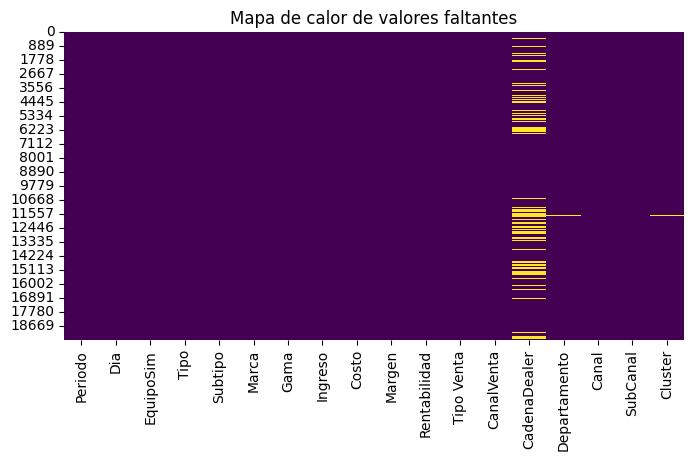

In [ ]:
# Revisar si hay posibles valores asociados faltantes entre variables
print("Revisando valores faltantes y posibles patrones de los mismos :\n")
plt.figure(figsize=(8, 4))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [ ]:
print('Observando valores de la variable CadenaDealer \n')
df["CadenaDealer"].groupby(df["CadenaDealer"]).size()

Observando valores de la variable CadenaDealer 



,CadenaDealer
CadenaDealer,
CPALOMINO-TE,1
CREDIVARGAS,64
CREDIVARGAS_PUCALLPA,14
CURACAO,25
CURACAO_ANDAHUAYLAS,7
...,...
TVOLUTION,16
VISUAL CONNECTIONS,8
WONG,5


In [ ]:
print('Valores de la variable CadenaDealer organiados de manera descendente \n')
df["CadenaDealer"].groupby(df["CadenaDealer"]).size().sort_values(ascending=False)

Valores de la variable CadenaDealer organiados de manera descendente 



,CadenaDealer
CadenaDealer,
ISLA,1795
PLAZAVEA,1766
TOTTUS,1497
TPF,788
METRO,781
...,...
TPF-TC ICAPISCO,1
DMAMANI3-TE,1
CPALOMINO-TE,1


##Análisis limpieza
- Con el resto de variables, se decide eliminar aquellos que son inferiores al 5% de datos faltantes considerando que la cantidad total es considerable para el análisis  (19.552)
- En el caso de la variable [CadenaDealer] se decide eliminarla, por un lado los vacíos correspoden principalmente a esta columna y no parecen estar asociados a otras, por otro de 19.552 datos, hay 3.309 que se podrían imputar por alguna técnica, pero hay 475 posibilidades para imputar y a mi juicio esto puede generar algún sesgo.


In [ ]:
df.drop(columns=["CadenaDealer"], inplace = True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19403 entries, 0 to 19551
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19403 non-null  int64  
 1   Dia           19403 non-null  int64  
 2   EquipoSim     19403 non-null  object 
 3   Tipo          19403 non-null  object 
 4   Subtipo       19403 non-null  object 
 5   Marca         19403 non-null  object 
 6   Gama          19403 non-null  object 
 7   Ingreso       19403 non-null  float64
 8   Costo         19403 non-null  float64
 9   Margen        19403 non-null  float64
 10  Rentabilidad  19403 non-null  float64
 11  Tipo Venta    19403 non-null  object 
 12  CanalVenta    19403 non-null  object 
 13  Departamento  19403 non-null  object 
 14  Canal         19403 non-null  object 
 15  SubCanal      19403 non-null  object 
 16  Cluster       19403 non-null  object 
dtypes: float64(4), int64(2), object(11)
memory usage: 2.7+ MB


- Después de una limpieza inicial tenemos que de 19552 datos, se va a trabajar con 19403 y 17 columnas

Se revisaron varios pairplot donde se especificó mostrar por alguna variable categórica los datos, puntualmente dos



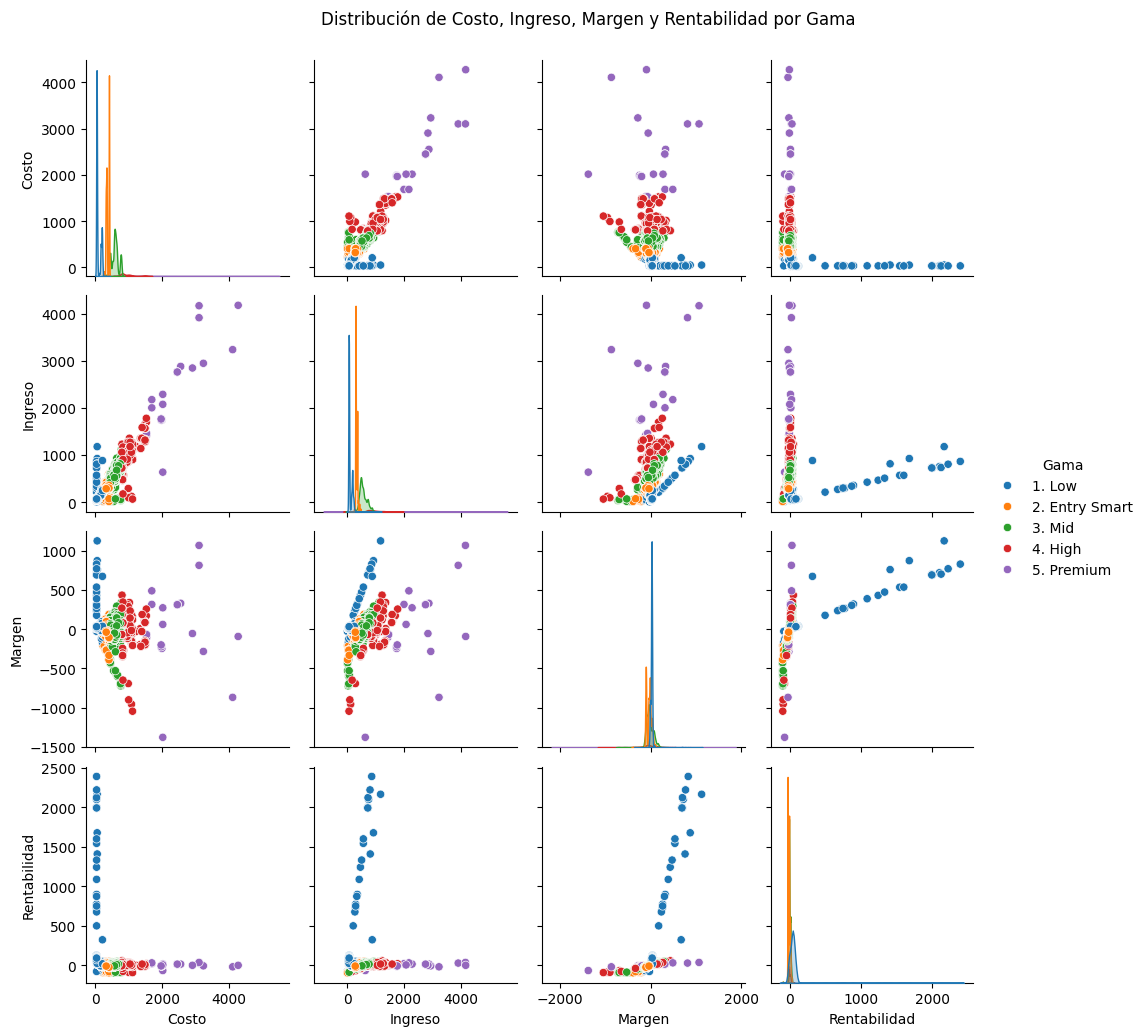

In [ ]:
# Revisar las relaciones entre las variables numéricas en base a otra variable

print("Se revisaron varios pairplot donde se especificó mostrar por alguna variable categórica los datos, puntualmente dos\n")

columnas1= ["Costo","Ingreso","Margen","Rentabilidad","Gama"]
sns.pairplot(data=df[columnas1], hue="Gama")
plt.title('Distribución de Costo, Ingreso, Margen y Rentabilidad por Gama', x=-0.9, y=4.4)
plt.show()

In [ ]:
print('Valores de la variable Gama organizados de manera descendente \n')
gama_counts = df["Gama"].value_counts()
gama_percentages = (gama_counts / len(df) * 100).round(2)

gama_table = pd.DataFrame({'Unidades': gama_counts, 'Porcentaje': gama_percentages})
gama_table = gama_table.sort_values(by='Unidades', ascending=False)

display(gama_table)

Valores de la variable Gama organizados de manera descendente 



,Unidades,Porcentaje
Gama,,
1. Low,6504,33.52
2. Entry Smart,6423,33.10
3. Mid,5893,30.37
4. High,560,2.89
5. Premium,23,0.12


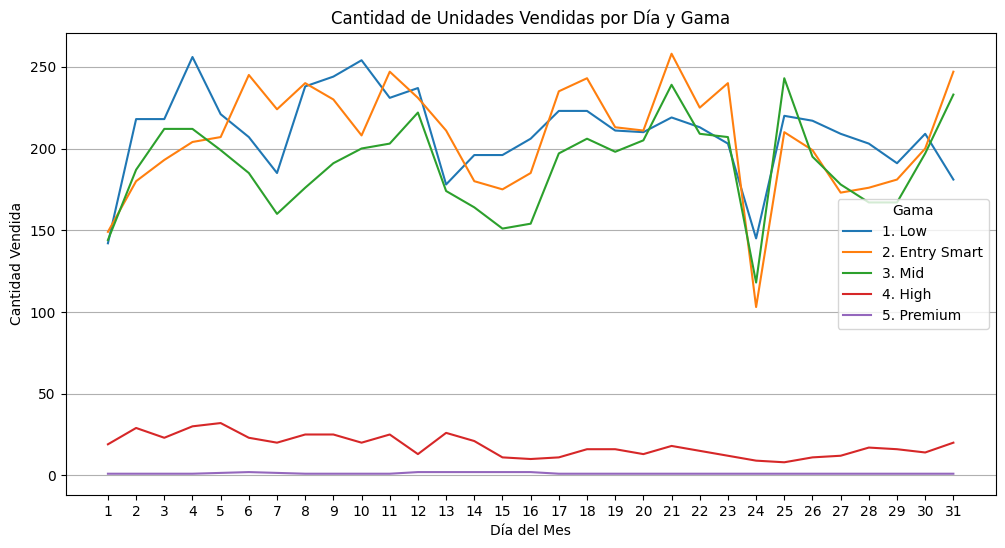

In [ ]:
ventas_por_dia_gama = df.groupby(['Dia', 'Gama']).size().reset_index(name='Cantidad_Vendida')

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_dia_gama, x='Dia', y='Cantidad_Vendida', hue='Gama')
plt.title('Cantidad de Unidades Vendidas por Día y Gama')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad Vendida')
plt.xticks(df['Dia'].unique())
plt.grid(axis='y')
plt.show()

## Análisis de la Distribución de Costo, Ingreso, Margen y Rentabilidad por Gama
Matriz de dispersión para visualizar relaciones entre cuatro variables principales: Costo, Ingreso, Margen y Rentabilidad, y como se distribuyen por Gama de producto

📊 Interpretación por partes

•	Distribuciones univariadas (diagonal principal):

En la diagonal se muestran los histogramas de cada variable. Y se aprecia que Costo, Ingreso, Margen y Rentabilidad tienen distribuciones muy asimétricas (sesgo positivo), es decir, la mayoría de los valores son bajos, pero hay pocos casos con valores muy altos (outliers).

•	Relación Costo vs. Ingreso

Existe una relación positiva clara: a mayor costo, mayor ingreso. Algo que supondríamos es lo “esperado” en este tipo de casos. Así, los productos Premium tienden a tener los costos e ingresos más altos. Mientras que en las gamas Low y Entry Smart se agrupan en el rango bajo de costo e ingreso.

•	Relación Costo vs. Margen

Margen varía de manera más dispersa, pero también muestra cierta correlación positiva con el costo en la mayoría de las gamas. Aunque hay casos con margen negativo, sobre todo en gamas medias y bajas.

•	Relación Margen vs. Rentabilidad

Existe una relación positiva clara: cuando el margen aumenta, la rentabilidad también. Siendo la gama Low en la que se observan casos con rentabilidad más alta respecto a su margen (posible efecto de costos muy bajos).

•	Relación Rentabilidad vs. Costo / Ingreso

No es estrictamente lineal: hay productos de bajo costo con alta rentabilidad y productos alto costo con rentabilidad baja. Podría tratarse de una relación inversamente proporcional.

-- Se podría llegar a suponer que la rentabilidad no depende solo del costo o ingreso, datos analizados aquí, sino también de la estrategia de precios (valores faltantes) u otra posible relación existente no analizada.

•	Unidades vendidas en el período analizado

Puntualmente se hizo necesario revisar si los datos pudieran, dado a lo encontrado, tener algún tipo de sesgo o desbalance de clases. En este caso, cuando se separan los datos por la variable Gama, se encontró que los niveles más altos de esta variable tienen representación de aproximadamente 3% del total de los datos.
Mientras que los otros tres niveles superaba cada uno el 30%. Este desbalance de clases podría ocasionar lo que en los gráficos de dispersión se observó, más dispersión (visual) de los datos en los niveles más bajos.

Así mismo, hay días del mes donde las compras de productos de la Gama más altas se pueden apreciar más fácilmente, mientras que en la Gama media y las bajas, tiende a tener fluctuaciones en el tiempo analizado. Aunque hay una cantidad de unidades vendidas el día 24 del mes.

-----------------------------------

📈Hallazgos Clave

Desbalance significativo de clases: Entre las gamas Premium y High representa menos de ~3% del dataset mientras que Low, Entry Smart y Mid superan cada una el 30%. Este desbalance explica la mayor dispersión visual en gamas bajas y puede sesgar las interpretaciones.

Rentabilidad independiente del valor absoluto: Productos de bajo costo pueden alcanzar rentabilidades superiores a productos de alto costo, evidenciando que en este caso la rentabilidad no es función directa del costo o ingreso, sino de otros posibles factores.

Paradoja de eficiencia por gama: La gama Low muestra los casos de mayor rentabilidad relativa a su margen, sugiriendo que hay productos de menor complejidad que pueden ser más eficientes que algunos de los productos sofisticados.

Márgenes negativos como señal de alerta: La presencia de márgenes negativos en múltiples gamas, indica productos que requieren revisión estratégica inmediata o posibles errores en la estructura de costos, precio o en definitiva que productos o referencias no están generando una retribución.

Comportamiento temporal diferenciado: Las gamas medias y bajas presentan fluctuaciones más constantes en el tiempo, reflejando diferentes dinámicas de demanda y ciclos de compra.




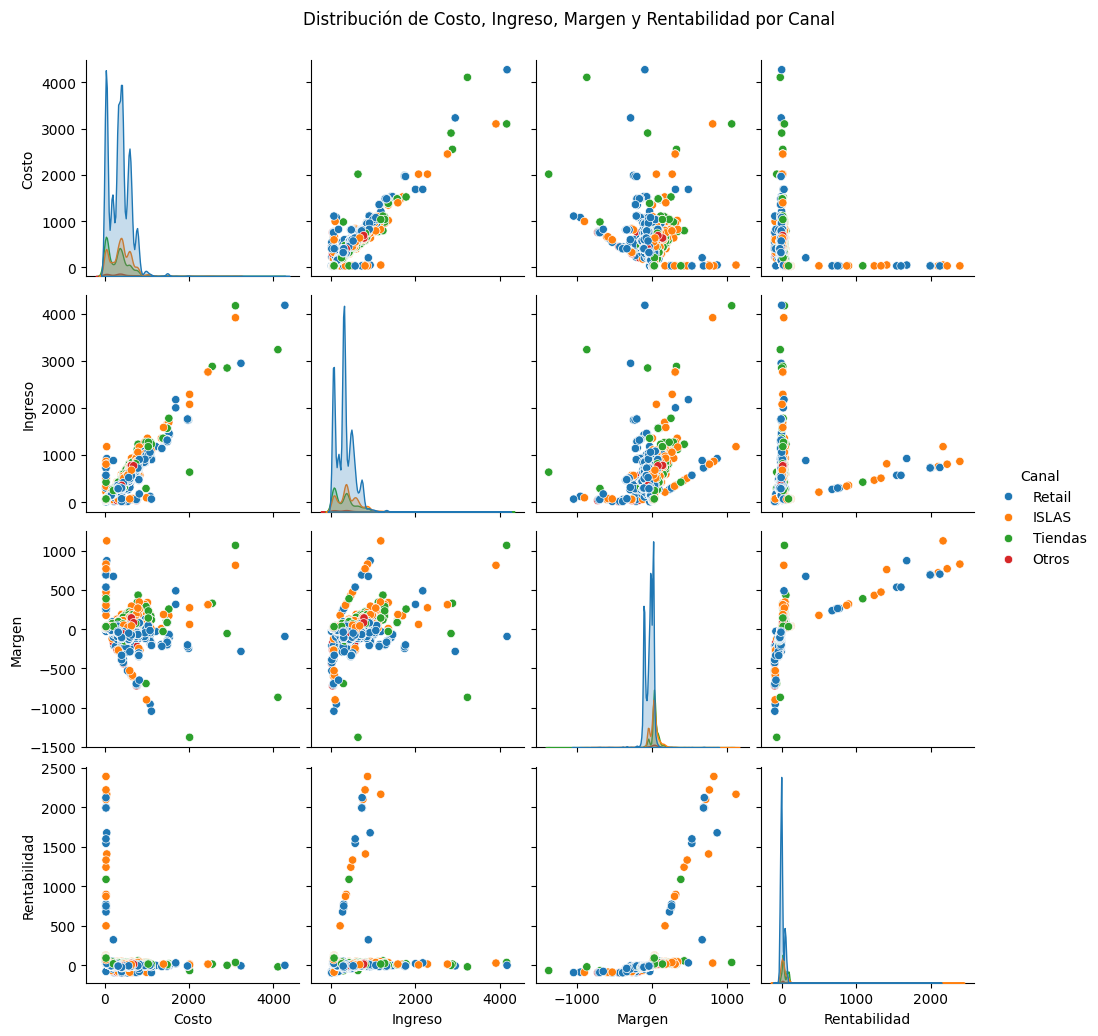

In [ ]:
columnas2= ["Costo","Ingreso","Margen","Rentabilidad","Canal"]
sns.pairplot(data=df[columnas2], hue="Canal")
plt.title('Distribución de Costo, Ingreso, Margen y Rentabilidad por Canal', x=-0.9, y=4.4)
plt.show()

In [ ]:
print('Valores de la variable Canal organizados de manera descendente \n')
canal_counts = df["Canal"].value_counts()
canal_percentages = (canal_counts / len(df) * 100).round(2)

canal_table = pd.DataFrame({'Unidades': canal_counts, 'Porcentaje': canal_percentages})
canal_table = canal_table.sort_values(by='Unidades', ascending=False)

display(canal_table)

Valores de la variable Canal organizados de manera descendente 



,Unidades,Porcentaje
Canal,,
Retail,13751,70.87
ISLAS,2942,15.16
Tiendas,2497,12.87
Otros,213,1.10


## Análisis de la Distribución de Costo, Ingreso, Margen y Rentabilidad por Canal
Matriz de dispersión para visualizar relaciones entre cuatro variables principales: Costo, Ingreso, Margen y Rentabilidad, y cómo se distribuyen por Canal de venta

________________________________________
📊 Interpretación por partes

• Distribuciones univariadas (diagonal principal)

En la diagonal se observan las distribuciones de cada variable (Costo, Ingreso, Margen y Rentabilidad) separadas por canal: Retail, Islas, Tiendas y Otros. Todas las variables presentan distribuciones asimétricas con sesgo positivo, concentrando la mayoría de valores en rangos bajos y unos pocos casos extremos (outliers) con valores muy elevados. Retail es el canal con mayor volumen de observaciones, mientras que Otros tiene una representación mínima. Y al revisar esto, un aproximadamente el 71% de los datos corresponden a este canal, mientras que aproximadamente el 1% corresponden a otros.

• Relación Costo vs. Ingreso

Parece existir una fuerte relación positiva: a mayor costo, mayor ingreso, consistente en todos los canales. Retail concentra la mayor parte de los puntos en el rango bajo-medio, mientras que Islas y Tiendas presentan algunos casos aislados con costos e ingresos muy altos.

• Relación Costo vs. Margen

La correlación es menos clara, con gran dispersión en todos los canales. Se identifican casos con márgenes negativos (pérdidas), más visibles en Retail y Tiendas. En Islas aparecen casos puntuales con márgenes altos, lo que podría asociarse a ventas de productos de alto valor agregado.

• Relación Margen vs. Rentabilidad

Aquí la tendencia es positiva: un aumento en el margen generalmente implica un aumento en la rentabilidad. Algunos puntos en Islas muestran una alta rentabilidad relativa a su margen, lo que puede indicar costos bajos.

• Relación Rentabilidad vs. Costo / Ingreso

No sigue una tendencia lineal. Existen productos de bajo costo con rentabilidades altas (sobre todo en Islas) y productos de alto costo con rentabilidad baja (presentes en todos los canales). Esto sugiere que la rentabilidad está influida por factores adicionales a costo e ingreso, algunos que podrían suponerse podrían ser la estrategia comercial, descuentos o manejo en precios, campañas u ofertas, o rotación de inventario.

________________________________________

📈Hallazgos Clave

•	Predominio del canal Retail: Concentra la mayoría de las transacciones, pero con menos casos extremos en rentabilidad y margen que otros canales.

•	Islas como nicho rentable: Aunque con menor volumen, presenta operaciones con alta rentabilidad y márgenes altos, posiblemente por productos exclusivos o ventas estacionales.

•	Presencia de márgenes negativos: Especialmente en Retail y Tiendas, lo que puede indicar productos con pérdidas o problemas en la estructura de costos/precios.

•	Rentabilidad no dependiente solo del costo: Algunos productos de bajo costo superan en rentabilidad a productos más caros, lo que rompe la correlación directa esperada y apunta a factores externos en la formación de precios.

•	Desbalance de representación por canal: Retail domina, mientras que Otros y Tiendas tienen menor presencia, lo que podría influir en la percepción visual de los datos y el análisis global.


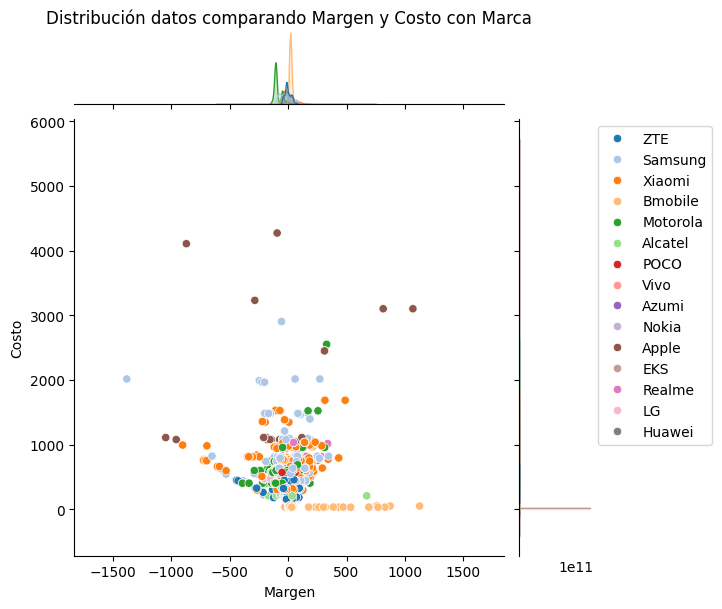

In [ ]:
sns.jointplot(data=df,x='Margen',y='Costo',hue='Marca',palette="tab20")
plt.title('Distribución datos comparando Margen y Costo con Marca', x=0.5, y=1.2)
plt.legend(bbox_to_anchor=(1.5,1.0))
plt.show()

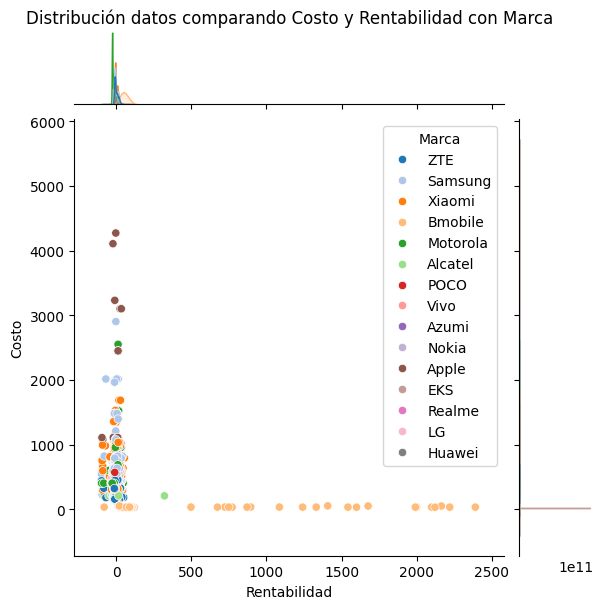

In [ ]:
sns.jointplot(data=df,x='Rentabilidad',y='Costo',hue='Marca',palette="tab20")
plt.title('Distribución datos comparando Costo y Rentabilidad con Marca', x=0.5, y=1.2)
plt.show()

In [ ]:
print('Valores de la variable Marca organizados de manera descendente \n')
marca_counts = df["Marca"].value_counts()
marca_percentages = (marca_counts / len(df) * 100).round(2)

marca_table = pd.DataFrame({'Unidades': marca_counts, 'Porcentaje': marca_percentages})
marca_table = marca_table.sort_values(by='Unidades', ascending=False)

display(marca_table)

Valores de la variable Marca organizados de manera descendente 



,Unidades,Porcentaje
Marca,,
Bmobile,4539,23.39
Motorola,4240,21.85
Samsung,3592,18.51
Xiaomi,3352,17.28
ZTE,2869,14.79
POCO,241,1.24
Alcatel,178,0.92
Vivo,121,0.62
Azumi,68,0.35


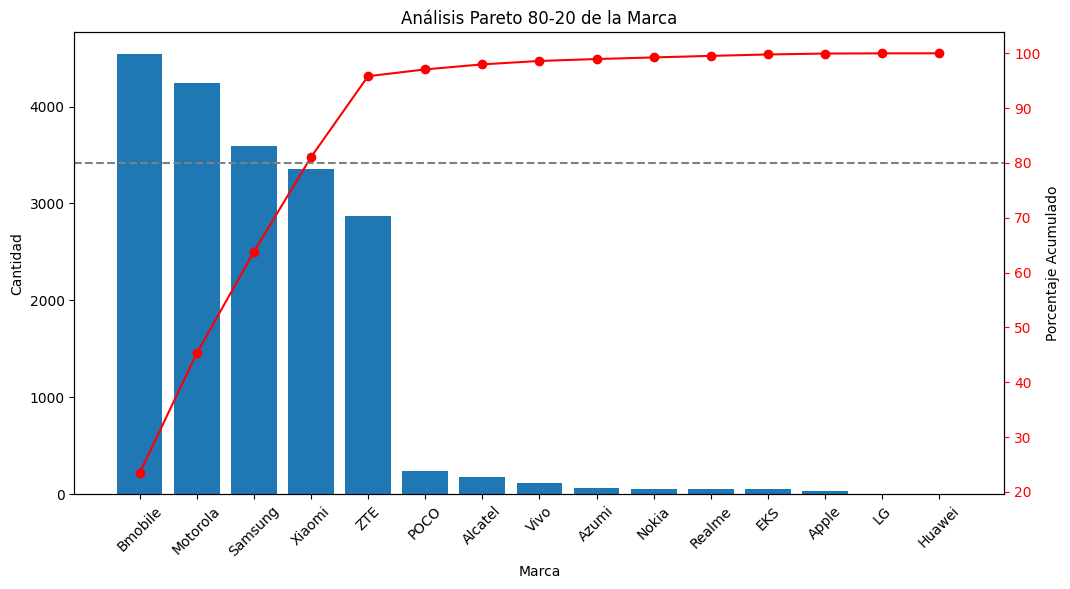

In [ ]:
# Para ver lo anterior en un análisis de Pareto se ejecuta el siguiente código
marca_counts = df['Marca'].value_counts()
marca_percentages = marca_counts / len(df) * 100
cumulative_percentages = marca_percentages.cumsum()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for counts
ax1.bar(marca_counts.index, marca_counts.values)
ax1.set_xlabel('Marca')
ax1.set_ylabel('Cantidad')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Análisis Pareto 80-20 de la Marca')

# Line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(cumulative_percentages.index, cumulative_percentages.values, color='red', marker='o')
ax2.set_ylabel('Porcentaje Acumulado')
ax2.tick_params(axis='y', colors='red')
ax2.axhline(80, color='gray', linestyle='dashed')

plt.show()

## Análisis de Comparación por Marca

📊 Interpretación por partes

-	Distribuciones univariadas (bordes del gráfico)

En los histogramas de los ejes se observa que la mayoría de las marcas concentran sus costos en valores bajos (cerca de 0 a 1000), con pocos casos extremos que no llegan ni a 5000. Y el margen se distribuye de forma más dispersa, con valores negativos y positivos, mientras que la rentabilidad presenta un comportamiento muy sesgado, con pocos valores extremadamente altos (especialmente en LG).

-	Relación Costo vs. Margen

La mayoría de los puntos se concentran en costos bajos y márgenes entre -500 y 500. Además, Bmobile destaca con márgenes muy altos incluso en costos muy bajos, lo que sugiere

-	Relación Costo vs. Rentabilidad

Se aprecia que Bmobile logra rentabilidades muy altas en productos de bajo costo, un fenómeno atípico que podría responder a optimización de costos o modelos de gran demanda. Mientras que, el resto de marcas mantienen rentabilidades más concentradas y moderadas, incluso cuando el costo aumenta. Apple sin embargo aparece en un rango de costos más alto pero sin rentabilidades extremas, lo que puede indicar estrategias más conservadoras en margen y volumen.

------------------------------------------------------------

📈Hallazgos Clave

•	Estrategia de eficiencia de Bmobile: márgenes y rentabilidades muy altos con costos bajos, lo que la posiciona como un caso de eficiencia destacable.

•	Riesgo en márgenes negativos: varias marcas presentan modelos con márgenes negativos, lo que indica que podrían estar vendiendo por debajo del costo.

•	Segmentación clara de costos: Apple y ciertos modelos de Samsung operan en el rango de costos más alto del dataset, lo que sugiere segmentación para clientes con poder adquisitivo.

•	Sesgo en datos: algunas marcas tienen pocos registros para el periodo evaluado (31 días), lo que podría distorsionar la percepción de su desempeño real en estas métricas. Y según el Pareto 80-20, 4 marcas de 15 suman el 80% de los datos, y con 5 marcas se alcanza más del 90% de los datos.


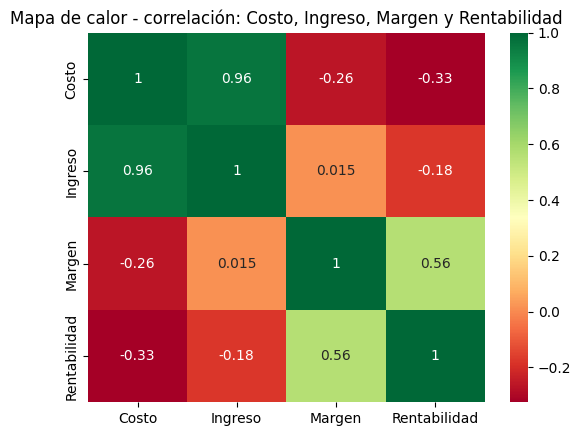

In [ ]:
df_heatmap=df[['Costo','Ingreso','Margen','Rentabilidad']]
sns.heatmap(df_heatmap.corr(), annot=True, cmap="RdYlGn")
plt.title('Mapa de calor - correlación: Costo, Ingreso, Margen y Rentabilidad')
plt.show()

## Correlaciones de Costo, Ingreso, Margen y Rentabilidad
📊Hallazgos principales: Correlaciones fuertes y “esperadas”:
Costo-Ingreso (0.96): Correlación casi perfecta, confirmando que los precios se establecen proporcionalmente a los costos.

-	Correlaciones negativas críticas:

Costo-Margen (-0.26): A mayor costo del producto, menor margen. Indica posibles ineficiencias en productos de alto costo.

Costo-Rentabilidad (-0.33): Los productos más costosos son menos rentables. Hallazgo contraintuitivo que sugiere problemas en la estrategia de premium pricing. Ingreso-Rentabilidad (-0.18): Incluso con mayores ingresos, la rentabilidad disminuye.

📈Insight estratégico crítico: El modelo de negocio actual presenta una paradoja de rentabilidad: los productos más caros y que generan más ingresos son los menos rentables. Pero esto podría deberse principalmente al desbalanceo de clases, donde los productos de alta gama están muy poco representados en los datos, comparados con los de baja gama. Pero también, análisis posteriores sugeriría análisis de sobrecostos y segmentaciones de productos por gama, en base a estructuras de costos estables y manejo de inventarios.


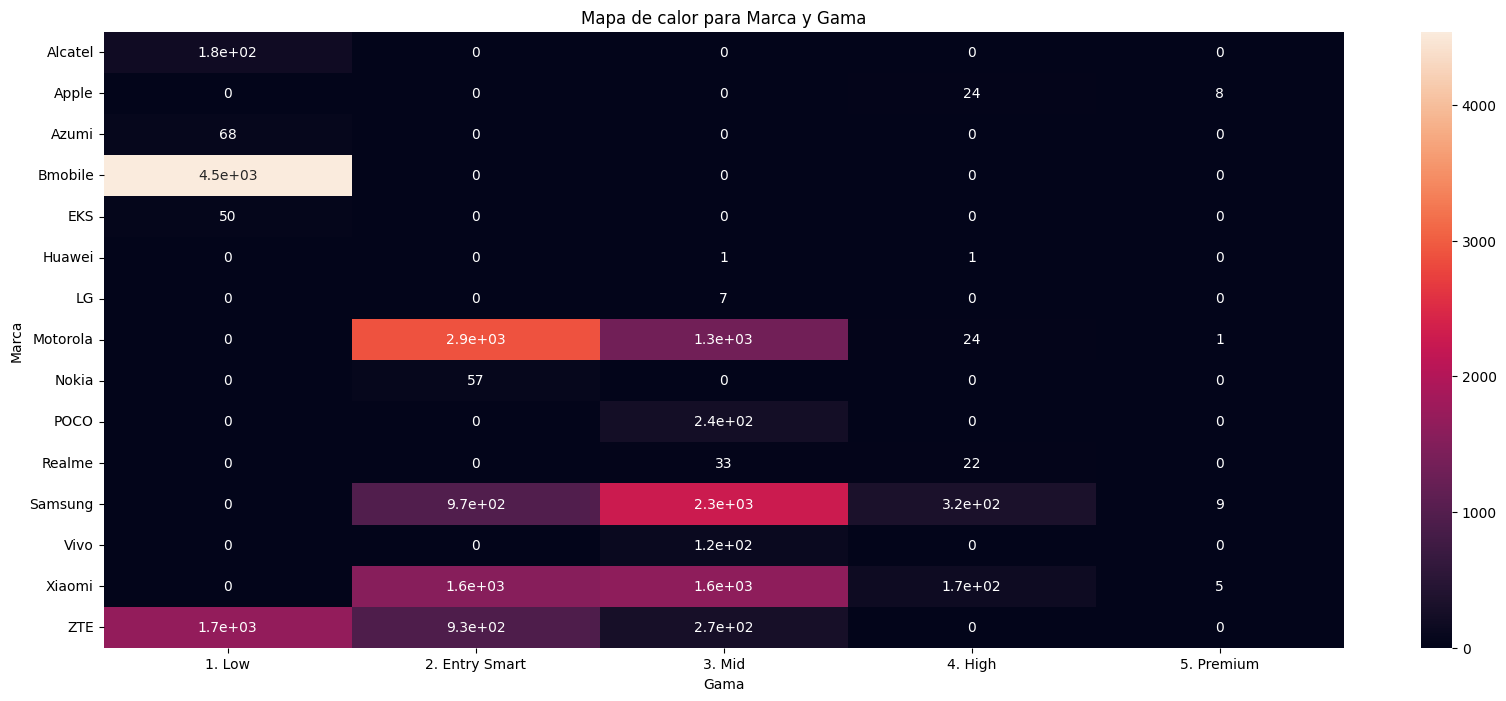

In [ ]:
pdcrosstab = pd.crosstab(df['Marca'], df['Gama'])
plt.figure(figsize=(20, 8))
sns.heatmap(pdcrosstab, annot=True)
plt.title('Mapa de calor para Marca y Gama')
plt.show()

## Análisis de la Relación Marca y Gama
📊Hallazgos principales:

•	Dominancia en segmentos específicos:

Bmobile domina completamente el segmento de la gama Low con 4,500 unidades. Motorola lidera en la gama Entry Smart (2,900) y tiene presencia fuerte en Mid (1,300). Samsung tiene una estrategia diversificada, siendo fuerte en Entry Smart (970) y Mid (2,300)

•	Estrategias de marca diferenciadas:

Apple se enfoca exclusivamente en las gamas altas (High y Premium). Xiaomi mantiene una estrategia de "valor por dinero" concentrándose en Entry Smart y Mid. Bmobile y Alcatel se posiciona únicamente en el segmento Low

📈Oportunidades de mercado:

El segmento Premium está poco saturado (solo Apple, Samsung, Xiaomi y Motorola)
Varias marcas como Huawei, LG, y Realme tienen presencia mínima, sugiriendo nichos específicos
Análisis de posicionamiento competitivo  Cómo cada marca se posiciona en diferentes segmentos de precio (gama)
Estrategias comerciales - Desde enfoque premium (Apple) hasta volumen masivo (Bmobile)


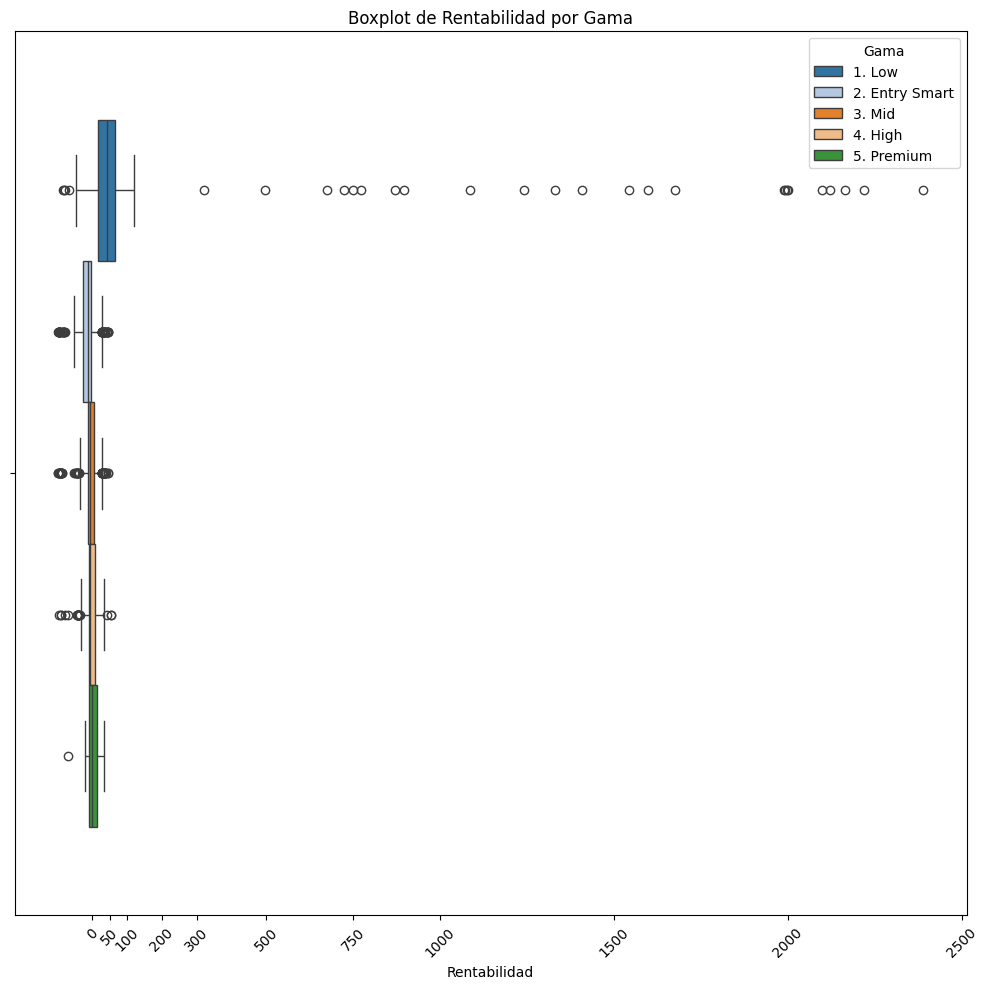

In [ ]:
# Revisando detalladamente la Rentabilidad por Gama

plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x="Rentabilidad", hue="Gama", palette="tab20")
plt.title('Boxplot de Rentabilidad por Gama')
plt.xticks([0, 50, 100, 200, 300, 500, 750, 1000, 1500, 2000, 2500], rotation=45)
plt.tight_layout()  # Ajusta automáticamente para que no se corten
plt.show()

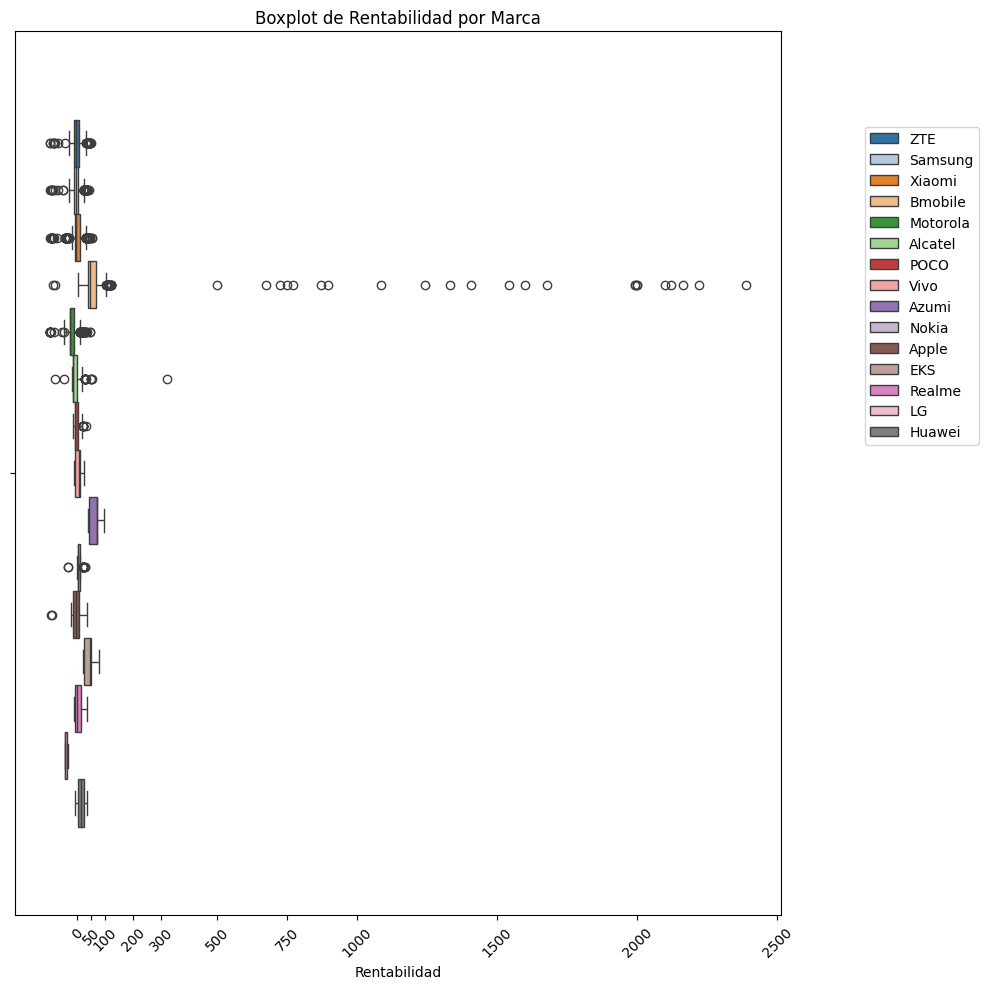

In [ ]:
# Revisando detalladamente la Rentabilidad por Marca

plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x="Rentabilidad", hue="Marca",palette="tab20")
plt.title('Boxplot de Rentabilidad por Marca')
plt.legend(bbox_to_anchor=(1.10,0.90))
plt.xticks([0, 50, 100, 200, 300, 500, 750, 1000, 1500, 2000, 2500], rotation=45)
plt.tight_layout()  # Ajusta automáticamente para que no se corten
plt.show()

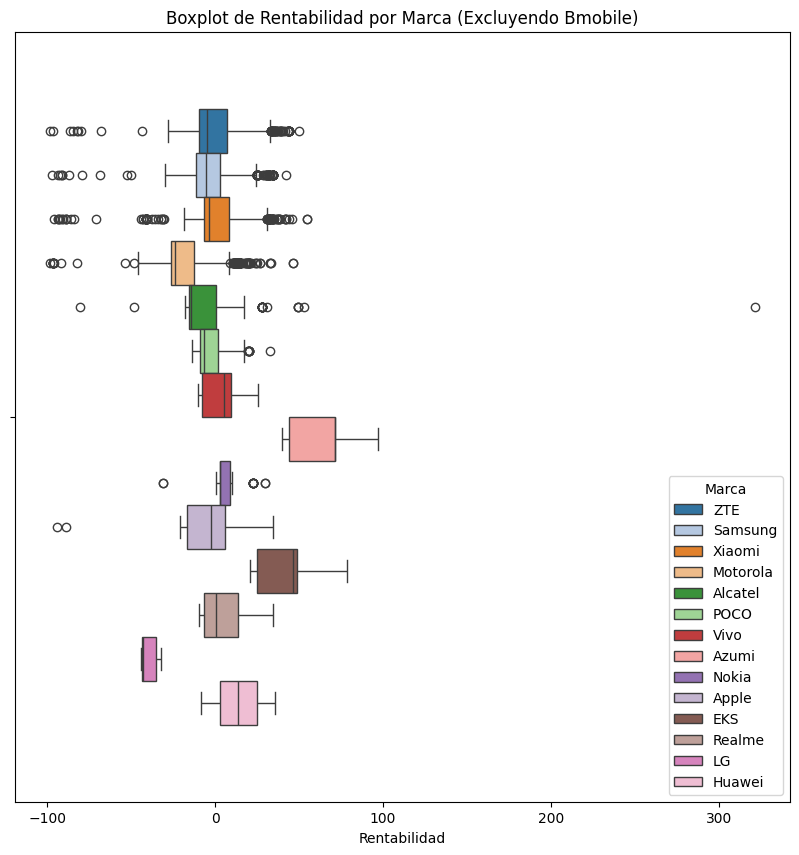

In [ ]:
df_filtered_no_Bmobile = df[df['Marca'] != 'Bmobile']

plt.figure(figsize=(10, 10))
sns.boxplot(data=df_filtered_no_Bmobile, x="Rentabilidad", hue="Marca", palette="tab20")
plt.title('Boxplot de Rentabilidad por Marca (Excluyendo Bmobile)')
plt.show()

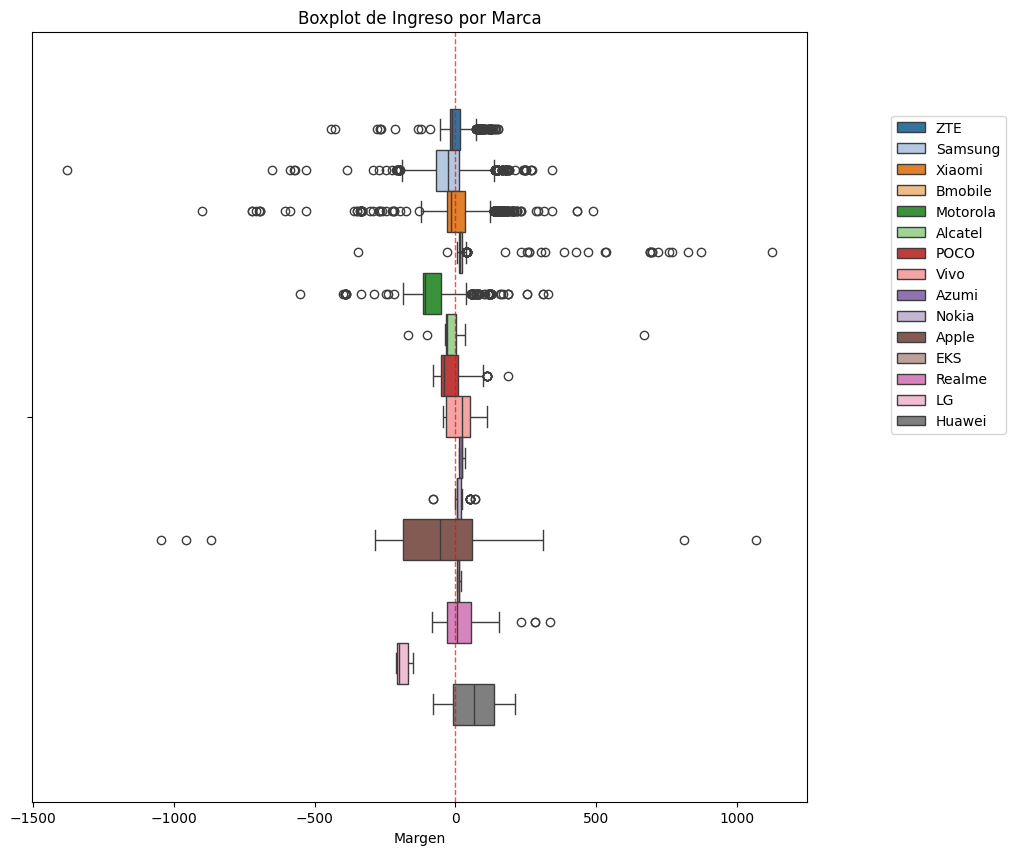

In [ ]:
# Revisando detalladamente lel Margen por Marca

plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x="Margen", hue="Marca",palette="tab20")
plt.title('Boxplot de Ingreso por Marca')
plt.legend(bbox_to_anchor=(1.10,0.90))
plt.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.show()

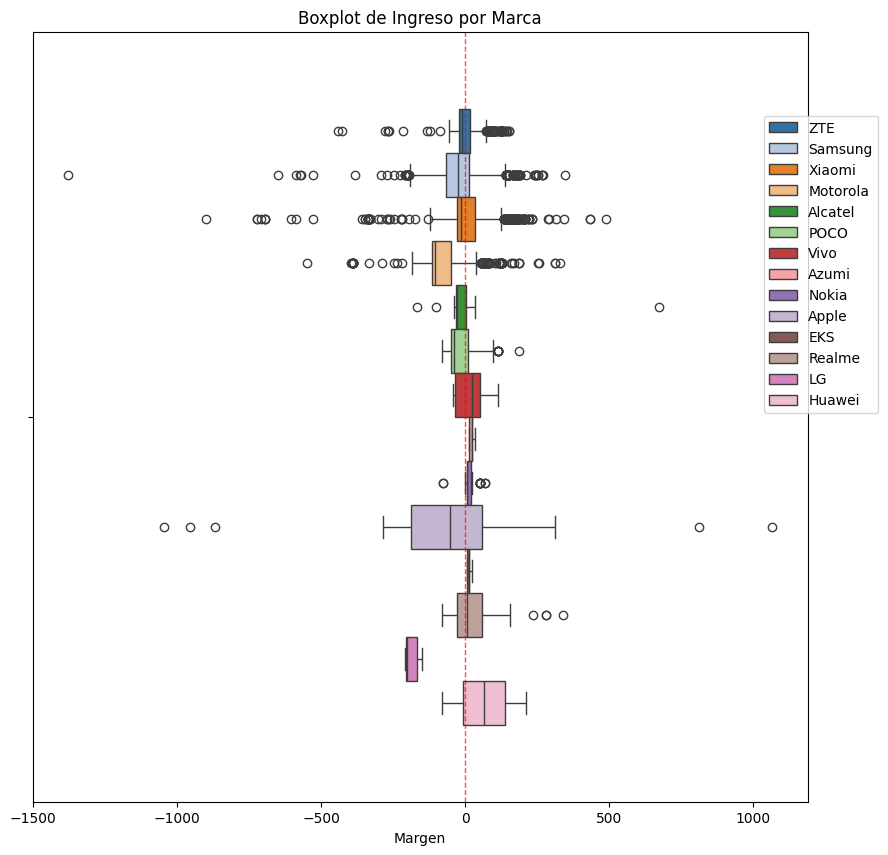

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_filtered_no_Bmobile, x="Margen", hue="Marca",palette="tab20")
plt.title('Boxplot de Ingreso por Marca')
plt.legend(bbox_to_anchor=(1.10,0.90))
plt.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.show()

## Análisis detallado de las distribuciones por Marca o Gama
📊 Análisis:

-	 Rentabilidad por Gama:

La gama mas notoria en el gráfico fue Low, que presentó una mediana mas alta que el resto, además de valores extremos, al punto de ser el único que tiene outliers con valores tan extremos que incluso sugeriría ser algún tipo de error, lo cual no se revisó previamente. Por su parte, la mediana es relativamente baja en el resto de las gamas, tendiendo a ser la misma según el gráfico. Pero el rango intercuartílico parece visualmente más estrecho en la gama Premium.

-	 Rentabilidad por Marca:

En general las distribuciones por cada marca están muy sesgadas hacia valores bajos de hasta 200. Múltiples outliers extremos dispersos en una marca en particular (Bmobile) pero presencia de outliers en varias marcas. La mayoría de marcas se concentran en el mismo rango de rentabilidad baja. Si se retira Bmobile del boxplot, se observa con mayor facilidad el comportamiento de las otras marcas; aquí se confirman rentabilidades negativas y, outliers y sesgos en varias marcas.

-	Margen por Marca:

En la mayoría de las marcas se obtienen productos con márgenes negativos. Pero la marca LG presenta toda su distribución en negativo, mientras que Azumi, Nokia, EKS, Huawei y Bmobile la mayoría de su distribución es positiva.



📈 Insights Clave:

Polarización Premium: La gama Premium no solo tiene valores altos sino también la mayor incertidumbre - alto riesgo, pero puede tener un alto potencial, o no.

Bmobile como líder en eficiencia: Claramente supera a otras marcas en margen, sugiriendo una estrategia con esta marca, implementada o un nicho potencial a aprovechar.

Apple paradox: A pesar de ser premium, muestra problemas de margen (incluso negativos), indicando posibles ineficiencias operativas.

Oportunidad de optimización: La concentración de la mayoría de marcas en rangos similares sugiere que hay espacio para diferenciación estratégica.


-----------------------------------------------------------------------------
## Conclusiones

🎯 Hallazgos Estratégicos Principales

1. Paradoja de Rentabilidad

El análisis revela un hallazgo contraintuitivo crítico: los productos más costosos son los menos rentables.

2. Desbalance de Representación de Datos

El dataset muestra un sesgo significativo hacia gamas bajas: Low, Entry Smart y Mid representan más del 90% de los datos, mientras que Premium y High apenas alcanzan el 3%. Este desbalance: Explica la mayor dispersión visual en gamas bajas. Puede estar sesgando las interpretaciones sobre rentabilidad por gama. Sugiere una dependencia excesiva en productos de bajo margen

3. Segmentación Clara del Mercado

El análisis por marca revela estrategias comerciales diferenciadas. Donde, Bmobile: Dominio absoluto en gama Low (4,500 unidades) con eficiencia excepcional. Apple: Enfoque exclusivo en segmentos premium pero con márgenes problemáticos. Samsung: Estrategia diversificada con presencia fuerte en múltiples gamas. Motorola y Xiaomi: Posicionamiento en valor por dinero (Entry Smart y Mid)

📊 Problemas Críticos Identificados

-	Márgenes Negativos Generalizados

Presencia de márgenes negativos en múltiples gamas y marcas. LG presenta su distribución completa en territorio negativo. Especialmente problemático en canales Retail y Tiendas. Indica productos vendidos por debajo del costo, problemas de inventarios o errores estructurales.

-	Ineficiencia Operativa Premium

Los productos de alto costo no generan rentabilidad proporcional. Apple, a pesar de su posicionamiento premium, muestra problemas de margen. Sugiere sobrecostos operativos o estrategias de pricing inadecuadas

🚀 Oportunidades Estratégicas

1. Optimización del Modelo Bmobile

Bmobile demuestra que es posible lograr: Márgenes altos con costos bajos. Rentabilidades excepcionales incluso en la gama Low. Se podría replizar su modelo en otras marcas o gamas

2. Aprovechamiento del Canal Islas

Aunque con menor volumen, presenta operaciones de alta rentabilidad. Márgenes más consistentes y positivos que otros canales. Potencial para productos exclusivos o estrategias estacionales

3. Mercado Premium Desaprovechado

Segmento Premium poco saturado con alta barrera de entrada. Oportunidad para marcas establecidas de diversificar hacia arriba. Necesidad de repensar la estrategia de costos para este segmento

📈 Recomendaciones Accionables

-	Inmediatas (0-3 meses)

1.	Auditoría de productos con margen negativo - Descontinuar o reestructurar

2.	Análisis profundo del modelo Bmobile - Identificar factores de éxito replicables

3.	Revisión de estructura de costos Premium - Especialmente Apple y Samsung en gamas altas

-	Mediano Plazo (3-6 meses)

1.	Rebalanceo del portafolio - Incrementar proporción de productos rentables

2.	Optimización del canal Islas - Escalar las mejores prácticas identificadas


3.	Estrategia diferenciada por gama - Políticas de pricing específicas por segmento

-	Largo Plazo (6+ meses)

1.	Entrada estratégica al segmento Premium - Con estructura de costos optimizada

2.	Diversificación controlada - Evitar la dependencia excesiva en gamas Low


3.	Implementación de métricas ROI - Sistema de monitoreo continuo de rentabilidad

💡 Reflexión Final

Este análisis demuestra que el volumen no garantiza rentabilidad y que la eficiencia operativa puede ser más valiosa que el posicionamiento premium. La empresa tiene la oportunidad de transformar su modelo de negocio aplicando las lecciones aprendidas del caso Bmobile y corrigiendo las ineficiencias identificadas en las gamas altas.

El éxito futuro dependerá de la capacidad para balancear volumen y margen, mientras se construye una estrategia premium sostenible basada en eficiencia operativa real, no solo en percepción de marca.





